In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
prvs = cv2.imread("C:/Users/cbim v left/Desktop/manual/frame/2011-12-01_0043-cam1-for-ss3/frame1.jpg", 0)
next = cv2.imread("C:/Users/cbim v left/Desktop/manual/frame/2011-12-01_0043-cam1-for-ss3/frame2.jpg", 0)

In [3]:
optical_flow = cv2.DualTVL1OpticalFlow_create()
flow = optical_flow.calc(prvs, next, None)
# mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
# hsv[...,0] = ang*180/np.pi/2
# hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
# rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
# plt.imshow('frame2',rgb)

In [4]:
flow.shape

(480, 640, 2)

In [4]:
def draw_flow(img, flow, step=16):
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (_x2, _y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
    return vis

def draw_hsv(flow):
    h, w = flow.shape[:2]
    fx, fy = flow[:,:,0], flow[:,:,1]
    ang = np.arctan2(fy, fx) + np.pi
    v = np.sqrt(fx*fx+fy*fy)
    hsv = np.zeros((h, w, 3), np.uint8)
    hsv[...,0] = ang*(180/np.pi/2)
    hsv[...,1] = 255
    hsv[...,2] = np.minimum(v*4, 255)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bgr

def warp_flow(img, flow):
    h, w = flow.shape[:2]
    flow = -flow
    flow[:,:,0] += np.arange(w)
    flow[:,:,1] += np.arange(h)[:,np.newaxis]
    res = cv2.remap(img, flow, None, cv2.INTER_LINEAR)
    return res

In [8]:
flow.shape

(480, 640, 2)

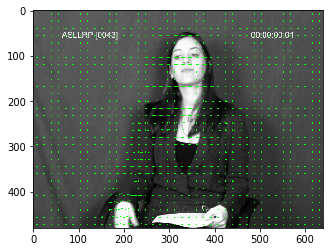

In [84]:
plt.imshow(draw_flow(next, flow))

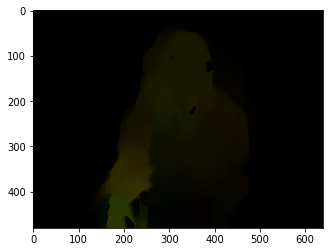

In [85]:
plt.imshow(draw_hsv(flow))

In [105]:
prvs = cv2.imread("C:/Users/cbim v left/Desktop/manual/frame/2011-12-01_0043-cam1-for-ss3/frame11.jpg", 0)
next = cv2.imread("C:/Users/cbim v left/Desktop/manual/frame/2011-12-01_0043-cam1-for-ss3/frame12.jpg", 0)
optical_flow = cv2.DualTVL1OpticalFlow_create()
flow = optical_flow.calc(prvs, next, None)
plt.imshow(draw_hsv(flow))

error: OpenCV(3.4.5) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [7]:
cur_glitch = prvs.copy()
cur_glitch = warp_flow(cur_glitch, flow)
cv2.imshow('glitch', cur_glitch)

In [37]:
x=np.array([-1.0,-1.0],dtype=np.float32)
x = np.expand_dims(x, axis =0)
x = np.expand_dims(x, axis =0)
flow = (flow-x)/2

In [38]:
flow

array([[[0.4958021 , 0.5032785 ],
        [0.49563527, 0.5055005 ],
        [0.49801418, 0.5011699 ],
        ...,
        [0.5040183 , 0.51148456],
        [0.50225246, 0.5128969 ],
        [0.4925589 , 0.5143352 ]],

       [[0.49576244, 0.5039923 ],
        [0.49567825, 0.5032564 ],
        [0.49726602, 0.50312763],
        ...,
        [0.50342673, 0.51329994],
        [0.5023172 , 0.5132845 ],
        [0.4928813 , 0.5144142 ]],

       [[0.4945596 , 0.5015489 ],
        [0.4952729 , 0.5027036 ],
        [0.49600825, 0.50214654],
        ...,
        [0.50320095, 0.5114551 ],
        [0.50323737, 0.5111107 ],
        [0.4946217 , 0.5103334 ]],

       ...,

       [[0.5012359 , 0.50480944],
        [0.5012585 , 0.50477326],
        [0.5012585 , 0.5048685 ],
        ...,
        [0.5056602 , 0.4936771 ],
        [0.5056615 , 0.4936907 ],
        [0.50567114, 0.4936842 ]],

       [[0.50139445, 0.50520194],
        [0.5012919 , 0.505383  ],
        [0.5013048 , 0.50547576],
        .